# Bananas
---
In this notebook, you will implement a DQN agent with Unity bananas

### 1. Import the Necessary Packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [2]:
env = UnityEnvironment(file_name="/Users/marliaae/dl/deep-reinforcement-learning/p1_navigation/Banana.app")
print(env)
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Please refer to the instructions in `Deep_Q_Network.ipynb` if you would like to write your own DQN agent.  Otherwise, run the code cell below to load the solution files.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
state_size = len(state)
print('States have length:', state_size)



Number of agents: 1
Number of actions: 4
States have length: 37


### 3. Train the Agent with DQN

Next cell is two helpers that trains agents and plots the results.

In [5]:

def dqn_train(agent, env, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)

            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=GOAL_ACHIEVED:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

def plot_scores(scores):
    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()



Running training on the DQN agent.

Episode 100	Average Score: 0.98
Episode 200	Average Score: 3.56
Episode 300	Average Score: 6.71
Episode 400	Average Score: 9.21
Episode 500	Average Score: 11.32
Episode 600	Average Score: 11.70
Episode 700	Average Score: 12.33
Episode 759	Average Score: 13.00
Environment solved in 659 episodes!	Average Score: 13.00
CPU times: user 8min 33s, sys: 3min 1s, total: 11min 35s
Wall time: 12min 59s


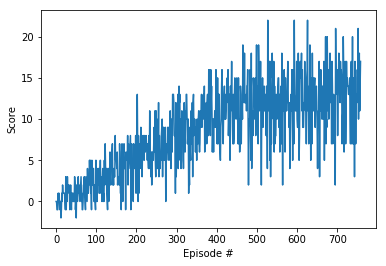

In [6]:
from dqn_agent import Agent
%timeit
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
GOAL_ACHIEVED = 13.0

%time dqn_scores = dqn_train(agent, env)
plot_scores(dqn_scores)

Episode 100	Average Score: 0.85
Episode 200	Average Score: 3.77
Episode 300	Average Score: 7.62
Episode 400	Average Score: 9.79
Episode 500	Average Score: 11.97
Episode 547	Average Score: 13.03
Environment solved in 447 episodes!	Average Score: 13.03
CPU times: user 7min 10s, sys: 2min 9s, total: 9min 19s
Wall time: 9min 29s


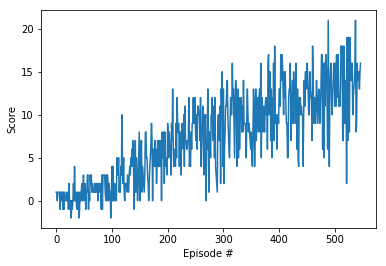

In [7]:
from dqn_agent import DDQNAgent
%timeit
agent = DDQNAgent(state_size=state_size, action_size=action_size, seed=0)
GOAL_ACHIEVED = 13.0

%time ddqn_scores = dqn_train(agent, env)
plot_scores(ddqn_scores)



### 4. Watch the trained Agent!

Loading the trained weights from file to watch a trained smart agent collecting bananas! Run 5 times and print the scores on each play/episode.

In [ ]:
# load the successful weights from file


from dqn_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))


for i in range(5):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    score = 0
    for j in range(1000):

        state = env_info.vector_observations[0]            # get the current state
        
        state = torch.from_numpy(state).float().unsqueeze(0).to("cpu")
        agent.qnetwork_local.eval()
        with torch.no_grad():
            action_values = agent.qnetwork_local(state)
        action = np.argmax(action_values.cpu().data.numpy())

        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward
        if done:
            break 
    print ("Score in episode", i, score)
            


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.15 µs


In [8]:
env.close()